In [110]:
import pandas as pd
import seaborn as sb
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
alt.renderers.enable('notebook')
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
%matplotlib inline

In [56]:
df = pd.read_csv("Columbus_Public_Owned_Trees.csv")

In [57]:
df.head()

,X,Y,OBJECTID,SITE_CLASS,ADDRESS,ZIP,DIAM_BREAST_HEIGHT,MAINTENANCE,PLANTING_DATE,INSPECTION_DATE,...,LIFE_STAGE1,PLANNING_AREA,PARK,SP_CODE,ADDR_NUM,STR_PRE_DIR,STR_NAME,STR_TYPE,STR_SUF_DIR,HEIGHT
0,-82.911315,39.969902,1,Street,102 MAYFAIR BLVD,43213.0,24.0,Structural Prune,NaN,2009-08-05T00:00:00.000Z,...,NaN,20A,NaN,"Oak, Pin",102.0,NaN,MAYFAIR,BLVD,NaN,NaN
1,-83.071679,39.962138,3,Street,338 N OGDEN AVE,43204.0,34.0,Structural Prune,NaN,2009-08-27T00:00:00.000Z,...,NaN,15B,NaN,"Maple, Sugar",338.0,N,OGDEN,AVE,NaN,NaN
2,-83.013483,39.979425,5,Street,343 WILBER AVE,43215.0,16.0,NaN,NaN,1996-02-14T00:00:00.000Z,...,NaN,13C,NaN,"Planetree, London",343.0,NaN,WILBER,AVE,NaN,NaN
3,-83.013563,39.979429,6,Street,343 WILBER AVE,43215.0,15.0,NaN,NaN,1996-02-14T00:00:00.000Z,...,NaN,13C,NaN,"Planetree, London",343.0,NaN,WILBER,AVE,NaN,NaN
4,-83.013565,39.979583,8,Street,352 WILBER AVE,43215.0,15.0,NaN,NaN,1996-02-14T00:00:00.000Z,...,NaN,13C,NaN,"Planetree, London",352.0,NaN,WILBER,AVE,NaN,NaN


In [58]:
df['CONDITION1'].unique()

array(['Fair', 'Poor', 'Dead', 'Good', 'Excellent', nan], dtype=object)

In [63]:
def isAsh(x):
    if ("Ash" in str(x)):
        return 1
    else:
        return 0
apply_dict = {"Poor":1}

df['isAsh'] = df['SP_CODE'].apply(isAsh)
df_cond_dummies = pd.get_dummies(df,columns=["CONDITION1"])

In [64]:
len(df[df['isAsh']==1])/len(df)

0.12242992564929091

In [65]:
np.corrcoef(df_cond_dummies['isAsh'], df_cond_dummies['CONDITION1_Excellent'])

array([[ 1.        , -0.02206466],
       [-0.02206466,  1.        ]])

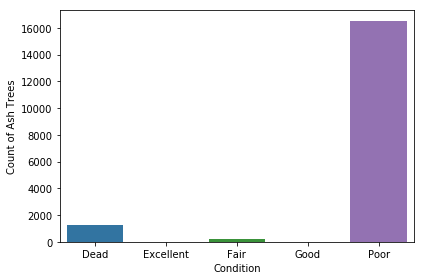

In [113]:
df_ash_con_gb = df[df['isAsh']==1].groupby("CONDITION1").agg({'OBJECTID':'count'}).reset_index()

fig = sb.barplot(data=df_ash_con_gb, x="CONDITION1", y="OBJECTID")
fig.set_xlabel("Condition")
fig.set_ylabel("Count of Ash Trees")
plt.savefig("columbus_ash_tree_condition.png", dpi=150)


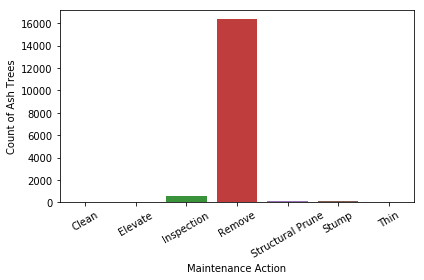

In [114]:
df_ash_con_gb = df[df['isAsh']==1].groupby("MAINTENANCE").agg({'OBJECTID':'count'}).reset_index()

fig = sb.barplot(data=df_ash_con_gb, x="MAINTENANCE", y="OBJECTID")
fig.set_xlabel("Maintenance Action")
fig.set_ylabel("Count of Ash Trees")
fig.tick_params(axis='x', rotation=30)
plt.savefig("columbus_ash_tree_maintain.png", dpi=150)

In [49]:
df[df["isAsh"]==1].columns

Index(['X', 'Y', 'OBJECTID', 'SITE_CLASS', 'ADDRESS', 'ZIP',
       'DIAM_BREAST_HEIGHT', 'MAINTENANCE', 'PLANTING_DATE', 'INSPECTION_DATE',
       'RETIRED', 'LIFE_STAGE1', 'PLANNING_AREA', 'PARK', 'SP_CODE',
       'ADDR_NUM', 'STR_PRE_DIR', 'STR_NAME', 'STR_TYPE', 'STR_SUF_DIR',
       'HEIGHT', 'isAsh', 'CONDITION1_Dead', 'CONDITION1_Excellent',
       'CONDITION1_Fair', 'CONDITION1_Good', 'CONDITION1_Poor'],
      dtype='object')